# About DataSet

---
1. Age : Age of the patient
2. Sex : Sex of the patient
3. exang: exercise induced angina (1 = yes; 0 = no)
4. ca: number of major vessels (0-3)
5. cp : Chest Pain type chest pain type
    Value 1: typical angina
    Value 2: atypical angina
    Value 3: non-anginal pain
    Value 4: asymptomatic trtbps : resting blood pressure (in mm Hg)
6. chol : cholestoral in mg/dl fetched via BMI sensor
7. fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
8. rest_ecg : resting electrocardiographic results
    Value 0: normal
    Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria thalach : maximum heart rate achieved
9. target :
    0= less chance of heart attack 
    1= more chance of heart attack
10. trtbps: This is the blood pressure of the patient in its normal state. 
11. thalachh: The Maximum heart rate achieved
12. output: Our target prediction 

---


In [125]:
#Importing all the frameworks we will need to import process and predict.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

from sklearn.preprocessing import MaxAbsScaler,MinMaxScaler,RobustScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.neural_network import MLPClassifier

#  Dataset Exploration

In [22]:
!pwd
df = pd.read_csv('/Users/mcdons/Downloads/heart.csv')


/Users/mcdons/Downloads


In [72]:
df.sample(5)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
203,68,1,2,180,274,1,0,150,1,1.6,1,0,3,0
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2,1
171,48,1,1,110,229,0,1,168,0,1.0,0,0,3,0
23,61,1,2,150,243,1,1,137,1,1.0,1,0,2,1


In [14]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [25]:
df.sample(5)
df.shape

(303, 14)

In [31]:
# Lets make sure the dataSet we are working with contain no missing data
print('The number of missing data in each column :')
missingData = df.isnull().sum()
total_percentage = (missingData.sum()/df.shape[0]) * 100
print(f'The total percentage of missing data is {round(total_percentage,2)}%')

print(missingData)

The number of missing data in each column :
The total percentage of missing data is 0.0%
age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64


#  EDA - Exploratory Data Analysis


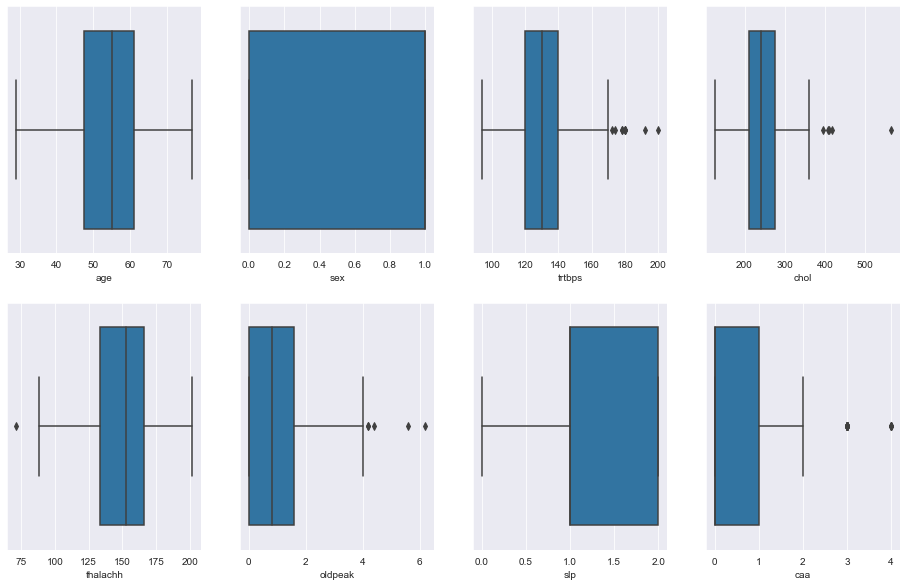

In [43]:

#Lets visualize what is going on with the numerical features only using boxplots. 
#we are excluding categorical features for this exploration because it may be a bit misleading
numeric_features = ['age', 'sex', 'trtbps', 'chol', 'thalachh', 'oldpeak', 'slp', 'caa']

df_Ada = df.loc[:, numeric_features].copy()
plt.figure(figsize=(16, 10))

for i in range(len(df_Ada.columns)):
    plt.subplot(2, 4, i + 1)
    sns.boxplot(df_Ada[df_Ada.columns[i]])

plt.show()

Observation:
We can see that from --- 

1.   Some of our data contains one two unique attributes which is expected. eg Sex
2.   The majority of entries in the dataframe for age is between 55 -65 years old
3. We have an attribute called target which is the likely hood for someone to have heart attack

In [ ]:
{column: len}

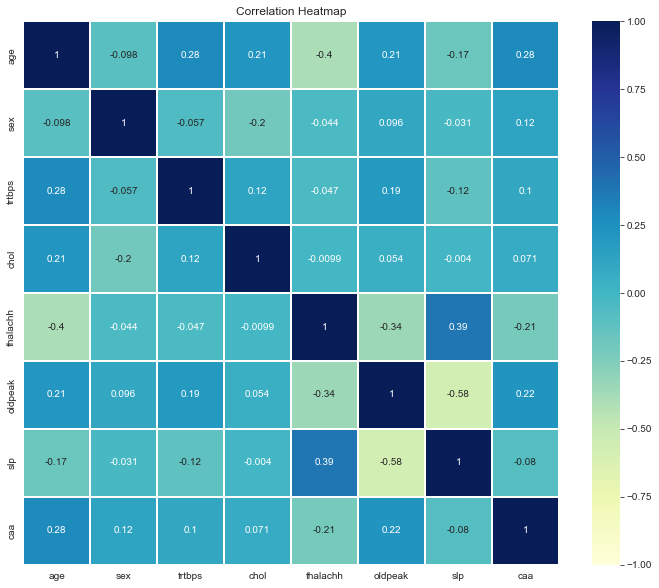

In [64]:
correlation = df_Ada.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation, annot=True, vmin=-1.0, linewidths=0.1, annot_kws={'size':10}, cmap='YlGnBu')
plt.title("Correlation Heatmap")
plt.show()

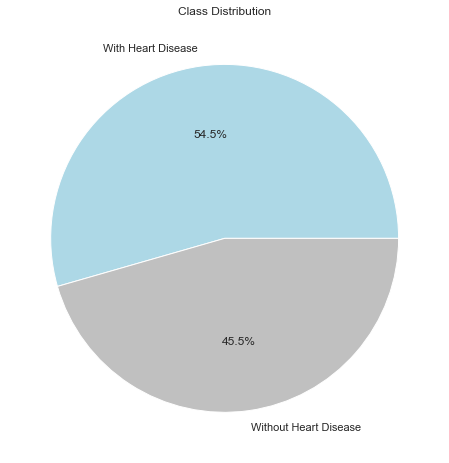

In [89]:
#Visualizing the class distribution for of the target variable

plt.figure(figsize=(8, 8))
plt.pie(df['output'].value_counts(), labels=["With Heart Disease", "Without Heart Disease"], autopct='%.1f%%',colors = ['lightblue','silver'])
plt.title("Class Distribution")
plt.show() #test

<AxesSubplot:xlabel='age', ylabel='count'>

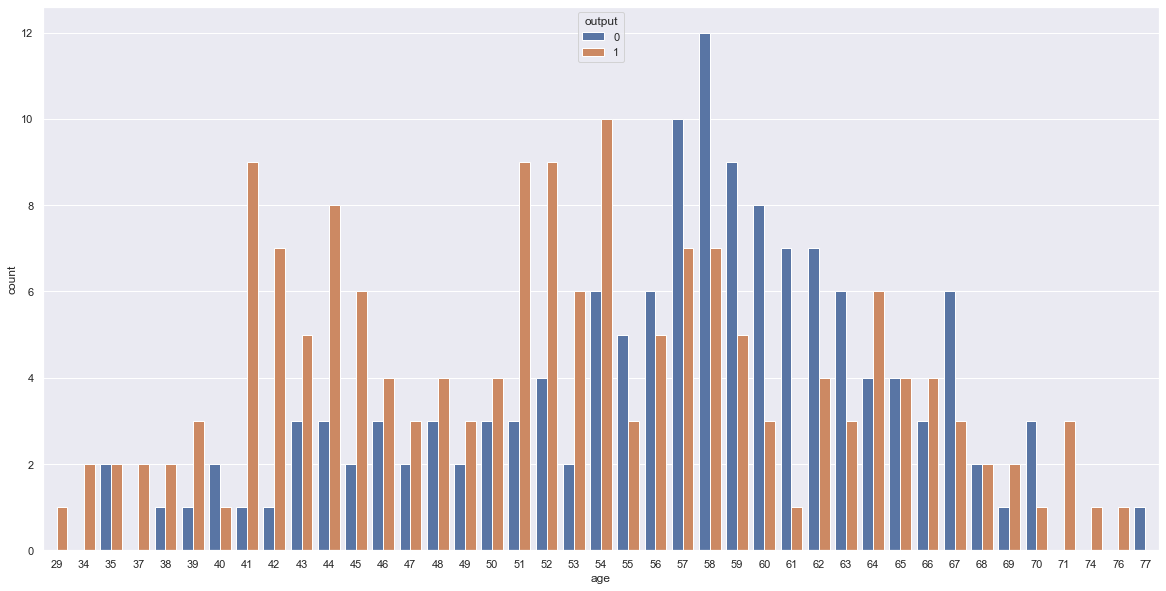

In [91]:
sns.set(rc={"figure.figsize":(20, 10)})
sns.countplot(x='age', hue=df['output'], data=df_Ada,)

**Observation**
 We can see that ther are outliers (spiking blues line in the plot) 
 For the meantime, we are replacing these outliers with 3 times the standard devation

# Preprocessing

In [93]:
#Encoding the norminal features of the dataFrame
def onehot_encode(df, column_dict):
    df = df.copy() # makin a df copy so as not to manipulate the existing data set
    for column, prefix in column_dict.items():
        dummies = pd.get_dummies(df[column], prefix=prefix)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    return df



In [99]:
#Preprocessing the scaler function to fit and transform the dataSet subseqient
def preprocess_inputs(df, scaler):
    df = df.copy()
    
    # One-hot encode the nominal features
    nominal_features = ['cp', 'slp', 'thall']
    df = onehot_encode(df, dict(zip(nominal_features, ['CP', 'SL', 'TH'])))
    
    # Split df into X and y
    y = df['output'].copy()
    X = df.drop('output', axis=1).copy() # where we are dropping the target column to predict
    
    # Scale X
    X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
    
    return X, y

In [113]:
# Scaling the data using the Standard Scaler
X, y = preprocess_inputs(df, StandardScaler())

X.head()

,age,sex,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,caa,...,CP_1,CP_2,CP_3,SL_0,SL_1,SL_2,TH_0,TH_1,TH_2,TH_3
0,0.952197,0.681005,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,1.087338,-0.714429,...,-0.444554,-0.634648,3.489114,3.664502,-0.926766,-0.939142,-0.081514,3.979112,-1.100763,-0.793116
1,-1.915313,0.681005,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,2.122573,-0.714429,...,-0.444554,1.575677,-0.286606,3.664502,-0.926766,-0.939142,-0.081514,-0.251312,0.908461,-0.793116
2,-1.474158,-1.468418,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,0.310912,-0.714429,...,2.249444,-0.634648,-0.286606,-0.272888,-0.926766,1.064802,-0.081514,-0.251312,0.908461,-0.793116
3,0.180175,0.681005,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.206705,-0.714429,...,2.249444,-0.634648,-0.286606,-0.272888,-0.926766,1.064802,-0.081514,-0.251312,0.908461,-0.793116
4,0.290464,-1.468418,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.379244,-0.714429,...,-0.444554,-0.634648,-0.286606,-0.272888,-0.926766,1.064802,-0.081514,-0.251312,0.908461,-0.793116


In [155]:
# Scaling the data using MinMax Scaler 
X, y = preprocess_inputs(df, MinMaxScaler())
X.head()

,age,sex,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,caa,...,CP_1,CP_2,CP_3,SL_0,SL_1,SL_2,TH_0,TH_1,TH_2,TH_3
0,0.708333,1.0,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.166667,1.0,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.250000,0.0,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.562500,1.0,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.583333,0.0,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [110]:
# To store the newDF into the HD5 and CSV file
# h5File = "heart_problem.h5";


X.to_csv("heart_problem.csv", sep='\t')
X.to_hdf("heart_problem.h5", "/data")

# df1 = pd.read_hdf("heart_problem.h5", "/data");
# print("DataFrame read from the HDF5 file through pandas:");
# print(df1);

**Observation**


*   The quantile transformer does have a different distribution among the others Tested
*   What we can basically conlude in terms of probably replacing missing values is to use mean (temporarily)



# Training & Testing the models

In [115]:
y # our target column of prediction

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: output, Length: 303, dtype: int64

In [116]:
# Traing the data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

In [117]:
# Testing Linear Regression Model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

print("Logistic Regression Accuracy: {:.2f}%".format(lr_model.score(X_test, y_test) * 100))

Logistic Regression Accuracy: 86.89%


In [122]:
# Testing Support vector Machine Model
svm_model = SVC()
svm_model.fit(X_train, y_train)

print("Support Vector Machine Accuracy: {:.2f}%".format(svm_model.score(X_test, y_test) * 100))

Support Vector Machine Accuracy: 88.52%


In [127]:
# Testing KNN Model
Knn_model = KNeighborsClassifier()
Knn_model.fit(X_train, y_train)

print("K-Nieghbours: {:.2f}%".format(Knn_model.score(X_test, y_test) * 100))

K-Nieghbours: 85.25%


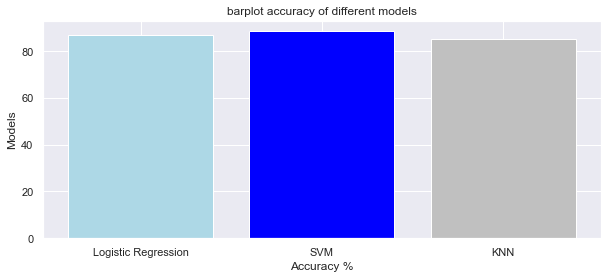

In [153]:
Model = ['Logistic Regression','SVM','KNN']
color = ['lightblue','blue','silver']
knnScore = Knn_model.score(X_test, y_test) * 100
svmScore = svm_model.score(X_test, y_test) * 100
lrScore = lr_model.score(X_test, y_test) * 100

accuracyScore = [lrScore,svmScore,knnScore] 

model_ev = pd.DataFrame({'Model': Model, 'Accuracy': accuracyScore })

plt.figure(figsize=(10,4))
plt.title("barplot accuracy of different models")
plt.xlabel("Accuracy %")
plt.ylabel("Models")
plt.bar(model_ev['Model'],model_ev['Accuracy'], color=color)
plt.show()


# Conlusion